In [1]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [3]:
path = "Example.txt"

In [4]:
import json
with open(path) as f:
    records = [json.loads(line) for line in f]

In [5]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [6]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [7]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [8]:
counts = get_counts(time_zones)
counts["America/New_York"]
len(time_zones)

3440

In [9]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [10]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [11]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [12]:
frame = pd.DataFrame(records)

In [13]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [14]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [15]:
frame["a"][1]
frame["a"][50]
frame["a"][51][:50]  # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [16]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [17]:
cframe = frame[frame["a"].notna()].copy()

In [18]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                        "Windows", "Not Windows")
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [19]:
by_tz_os = cframe.groupby(["tz", "os"])

In [20]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [21]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([ 2,  7,  5,  4, 14, 11,  9,  8, 24, 26])

In [22]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [23]:
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [24]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [25]:
import seaborn as sns


print(count_subset.columns)


Index(['Not Windows', 'Windows'], dtype='object', name='os')


In [26]:
print(count_subset.head())

os                 Not Windows  Windows
tz                                     
America/Sao_Paulo         13.0     20.0
Europe/Madrid             16.0     19.0
Pacific/Honolulu           0.0     36.0
Asia/Tokyo                 2.0     35.0
Europe/London             43.0     31.0


Index(['index', 'tz', 'Not Windows', 'Windows'], dtype='object', name='os')


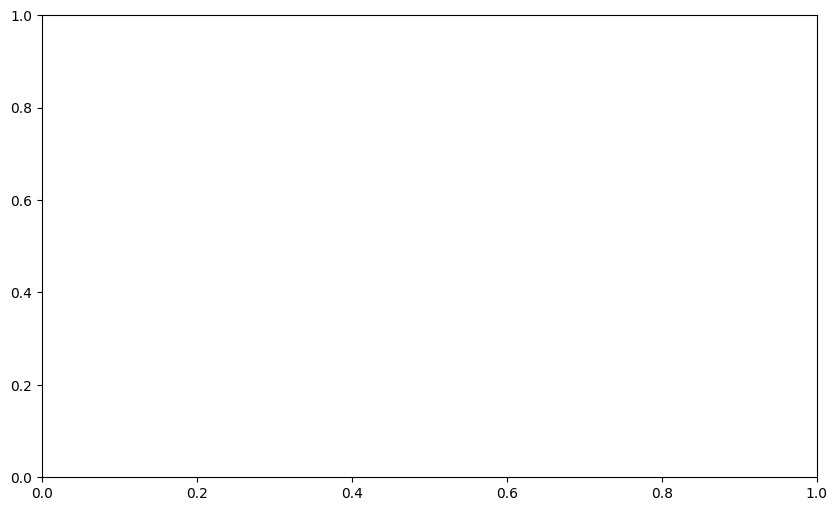

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
print(count_subset.head(10))

   index             category  attribute  value
0      0    America/Sao_Paulo       13.0   20.0
1      1        Europe/Madrid       16.0   19.0
2      2     Pacific/Honolulu        0.0   36.0
3      3           Asia/Tokyo        2.0   35.0
4      4        Europe/London       43.0   31.0
5      5       America/Denver      132.0   59.0
6      6  America/Los_Angeles      130.0  252.0
7      7      America/Chicago      115.0  285.0
8      8                           245.0  276.0
9      9     America/New_York      339.0  912.0


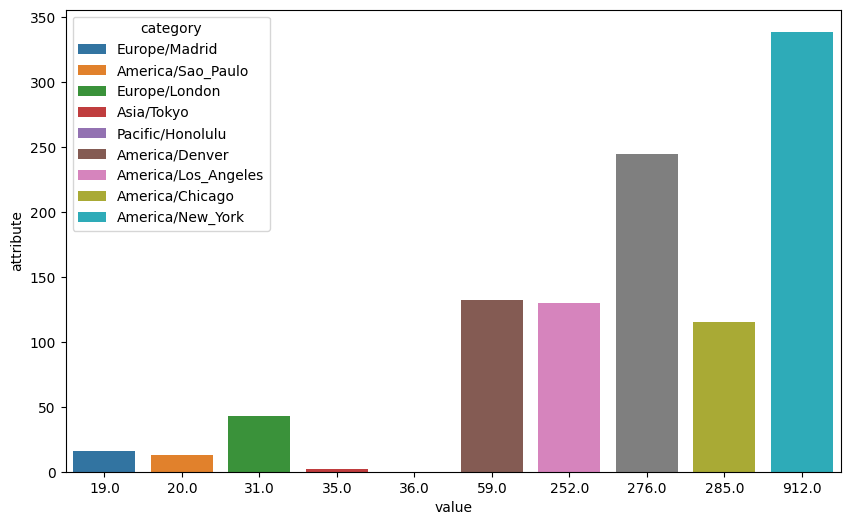

In [34]:
sns.barplot(x="value", y="attribute", hue="category", data=count_subset)
plt.show()


In [35]:
print(count_subset['category'].unique())

['America/Sao_Paulo' 'Europe/Madrid' 'Pacific/Honolulu' 'Asia/Tokyo'
 'Europe/London' 'America/Denver' 'America/Los_Angeles' 'America/Chicago'
 '' 'America/New_York']


In [36]:
print(count_subset.head(10))

   index             category  attribute  value
0      0    America/Sao_Paulo       13.0   20.0
1      1        Europe/Madrid       16.0   19.0
2      2     Pacific/Honolulu        0.0   36.0
3      3           Asia/Tokyo        2.0   35.0
4      4        Europe/London       43.0   31.0
5      5       America/Denver      132.0   59.0
6      6  America/Los_Angeles      130.0  252.0
7      7      America/Chicago      115.0  285.0
8      8                           245.0  276.0
9      9     America/New_York      339.0  912.0


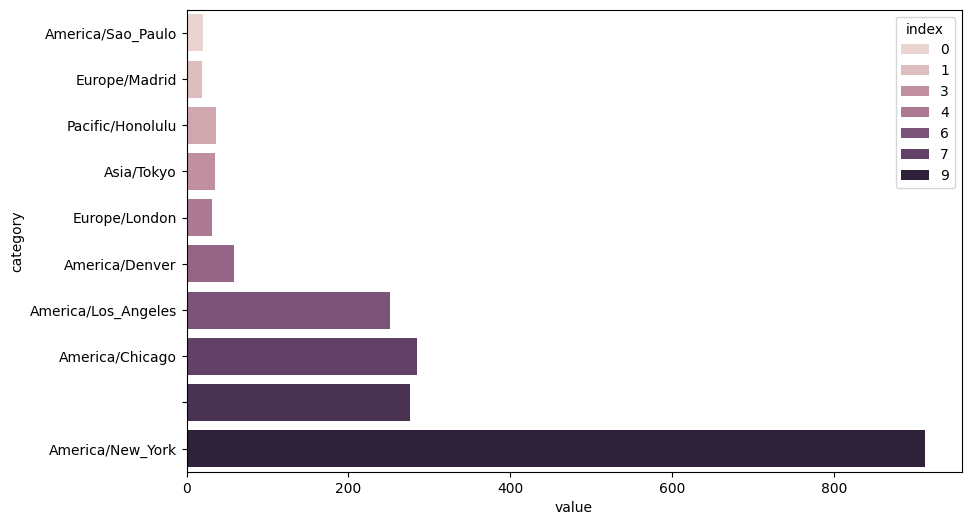

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="value", y="category", hue="index", data=count_subset)
plt.show()